In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix


In [0]:
data=pd.read_csv('customer_churn.csv')

In [0]:
data.columns

Out[60]: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [0]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
data.dtypes

Out[4]: customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [0]:
#data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [0]:
data.isnull().sum()

Out[64]: customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
data.isna().sum()

Out[8]: customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
data['Dependents'].mode()
# most frequent data 

Out[68]: 0    No
dtype: object

In [0]:
col_list = list(data.columns)
col_list.remove('Churn')
for col in col_list:
    if data[col].dtypes=='object':
        #print('ob')
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        #print('num')
        data[col] = data[col].fillna(data[col].mean())

In [0]:
#data.dropna(inplace=True)

In [0]:
data.isna().sum()

Out[70]: customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
data.drop(columns = ['customerID'],inplace = True)

In [0]:
#gender
# m
#

In [0]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#for i in col_list:
#    data[i]=labelencoder.fit_transform(data[i])

In [0]:
data['Churn'].value_counts()

Out[72]: No     5174
Yes    1869
Name: Churn, dtype: int64

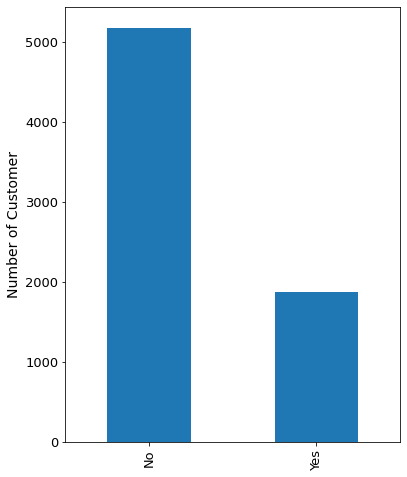

In [0]:
ax = data["Churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

plt.show()

In [0]:
data['Churn']=data['Churn'].map({'Yes':1,'No':0})

In [0]:
data['Churn'].mean()

Out[77]: 0.2653698707936959

In [0]:
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['MultipleLines']=data['MultipleLines'].map({'No phone service':0, 'No': 1, "Yes": 2})
data['InternetService']=data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
data['OnlineSecurity']=data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
data['OnlineBackup']=data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
data['DeviceProtection']=data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
data['TechSupport']=data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
data['StreamingTV']=data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
data['StreamingMovies']=data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
data['Contract']=data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
data['PaperlessBilling']=data['PaperlessBilling'].map({'Yes':1, 'No':0})
data['PaymentMethod']=data['PaymentMethod'].map({'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})


In [0]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,0,0,0,...,0,0,0,0,0,1,1,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,Yes,1,0,1,...,1,0,0,0,1,0,0,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,Yes,1,0,1,...,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,No,0,0,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,Yes,1,1,0,...,0,0,0,0,0,1,1,70.70,151.65,1


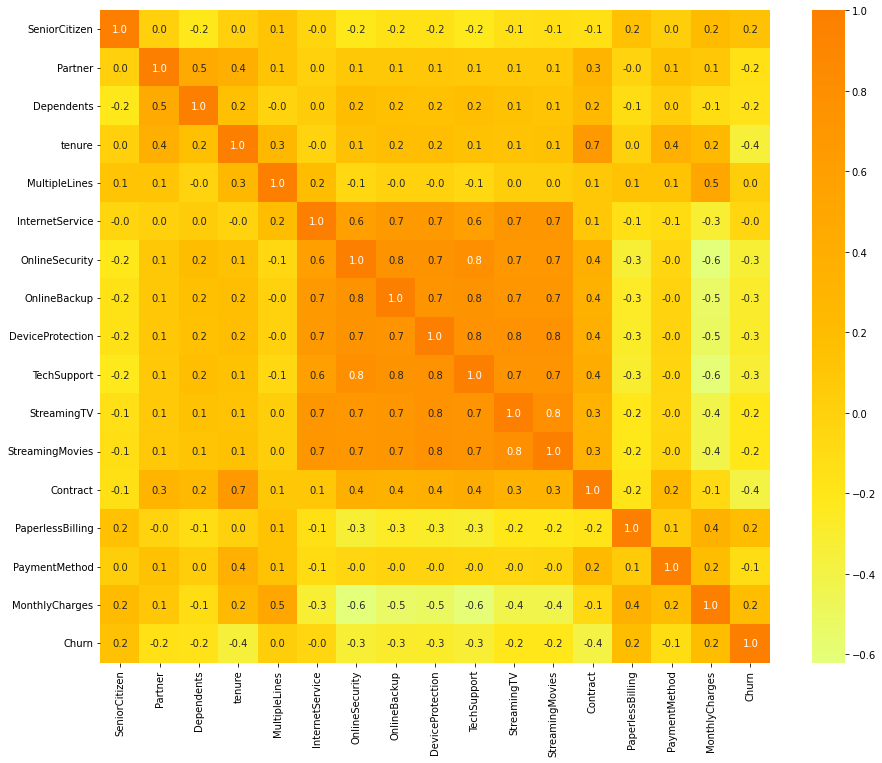

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 12))
sns.heatmap(data.corr(), cmap="Wistia", annot=True, fmt=".1f")
plt.show()

In [0]:
data.describe()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,1.325004,0.872923,0.720006,0.778220,0.777226,0.723555,0.817691,0.821241,0.690473,0.592219,1.422547,64.761692
std,0.368612,0.499748,0.458110,24.559481,0.642730,0.737796,0.796885,0.778472,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.064952,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000
75%,0.000000,1.000000,1.000000,55.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000
max,1.000000,1.000000,1.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000


In [0]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,No,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,No
1,Male,0,0,0,34,Yes,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.5,No
2,Male,0,0,0,2,Yes,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,Yes
3,Male,0,0,0,45,No,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,Female,0,0,0,2,Yes,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,Yes


In [0]:
#for col_name in col:
#    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
#        plt.boxplot(data[col_name])
#        plt.xlabel(col_name)
#        plt.ylabel('count')
#        plt.show()

In [0]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SeniorCitizen        0.00
Partner              1.00
Dependents           1.00
tenure              46.00
MultipleLines        1.00
InternetService      1.00
OnlineSecurity       1.00
OnlineBackup         1.00
DeviceProtection     1.00
TechSupport          1.00
StreamingTV          1.00
StreamingMovies      1.00
Contract             1.00
PaperlessBilling     1.00
PaymentMethod        1.00
MonthlyCharges      54.35
Churn                1.00
dtype: float64


In [0]:
Q1 = data.tenure.quantile(0.25)
Q3 = data.tenure.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.tenure >= Q1 - 1.5*IQR) & (data.tenure <= Q3 + 1.5*IQR)]

Q1 = data.MonthlyCharges.quantile(0.25)
Q3 = data.MonthlyCharges.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.MonthlyCharges >= Q1 - 1.5*IQR) & (data.MonthlyCharges <= Q3 + 1.5*IQR)]



In [0]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,No,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,No
1,Male,0,0,0,34,Yes,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.5,No
2,Male,0,0,0,2,Yes,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,Yes
3,Male,0,0,0,45,No,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,Female,0,0,0,2,Yes,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,Yes


In [0]:
data['SeniorCitizen'].value_counts()

Out[23]: 0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [0]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,No,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,No
1,Male,0,0,0,34,Yes,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.5,No
2,Male,0,0,0,2,Yes,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,Yes
3,Male,0,0,0,45,No,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,Female,0,0,0,2,Yes,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,Yes


In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Churn') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
print(vif_data)
print(vif_data.max())

             feature        VIF
0      SeniorCitizen   1.358780
1            Partner   2.821029
2         Dependents   1.947188
3             tenure   6.993951
4      MultipleLines   8.778191
5    InternetService   7.504377
6     OnlineSecurity   6.552500
7       OnlineBackup   6.704228
8   DeviceProtection   7.492188
9        TechSupport   7.295159
10       StreamingTV   8.355639
11   StreamingMovies   8.383363
12          Contract   4.119995
13  PaperlessBilling   2.801144
14     PaymentMethod   3.156515
15    MonthlyCharges  10.568905
feature       tenure
VIF        10.568905
dtype: object


In [0]:
data=data.drop(['MonthlyCharges'], axis = 1) 

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Churn') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
print(vif_data)
print(vif_data.max())

             feature       VIF
0      SeniorCitizen  1.347936
1            Partner  2.806947
2         Dependents  1.939032
3             tenure  6.568483
4      MultipleLines  5.192928
5    InternetService  7.453955
6     OnlineSecurity  6.369667
7       OnlineBackup  6.573677
8   DeviceProtection  7.458654
9        TechSupport  7.213775
10       StreamingTV  8.327994
11   StreamingMovies  8.348877
12          Contract  4.119188
13  PaperlessBilling  2.424722
14     PaymentMethod  2.993692
feature      tenure
VIF        8.348877
dtype: object


In [0]:
data=data.drop(['StreamingMovies'], axis = 1) 

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Churn') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
print(vif_data)
print(vif_data.max())

             feature       VIF
0      SeniorCitizen  1.347384
1            Partner  2.806642
2         Dependents  1.938492
3             tenure  6.565586
4      MultipleLines  5.192398
5    InternetService  7.133570
6     OnlineSecurity  6.345980
7       OnlineBackup  6.545425
8   DeviceProtection  7.203402
9        TechSupport  7.100263
10       StreamingTV  7.250616
11          Contract  4.115244
12  PaperlessBilling  2.421121
13     PaymentMethod  2.993676
feature      tenure
VIF        7.250616
dtype: object


In [0]:
data=data.drop(['StreamingTV'], axis = 1) 

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Churn') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
print(vif_data)
print(vif_data.max())

             feature       VIF
0      SeniorCitizen  1.347369
1            Partner  2.805970
2         Dependents  1.938221
3             tenure  6.562790
4      MultipleLines  5.190454
5    InternetService  6.385755
6     OnlineSecurity  6.317541
7       OnlineBackup  6.452342
8   DeviceProtection  6.739333
9        TechSupport  6.848864
10          Contract  4.105972
11  PaperlessBilling  2.407250
12     PaymentMethod  2.992407
feature      tenure
VIF        6.848864
dtype: object


In [0]:
data=data.drop(['TechSupport'], axis = 1) 

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Churn') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
print(vif_data)
print(vif_data.max())

             feature       VIF
0      SeniorCitizen  1.339316
1            Partner  2.804629
2         Dependents  1.936295
3             tenure  6.525883
4      MultipleLines  5.185407
5    InternetService  6.285648
6     OnlineSecurity  5.590762
7       OnlineBackup  6.092605
8   DeviceProtection  6.270989
9           Contract  3.959332
10  PaperlessBilling  2.407185
11     PaymentMethod  2.991543
feature      tenure
VIF        6.525883
dtype: object


In [0]:
data=data.drop(['tenure'], axis = 1) 

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Churn') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
print(vif_data)
print(vif_data.max())

             feature       VIF
0      SeniorCitizen  1.329197
1            Partner  2.650552
2         Dependents  1.927472
3      MultipleLines  4.691604
4    InternetService  6.126290
5     OnlineSecurity  5.585055
6       OnlineBackup  6.018895
7   DeviceProtection  6.264913
8           Contract  2.630666
9   PaperlessBilling  2.373337
10     PaymentMethod  2.790823
feature    SeniorCitizen
VIF             6.264913
dtype: object


In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Churn') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
print(vif_data)
print(vif_data.max())

             feature       VIF
0      SeniorCitizen  1.329197
1            Partner  2.650552
2         Dependents  1.927472
3      MultipleLines  4.691604
4    InternetService  6.126290
5     OnlineSecurity  5.585055
6       OnlineBackup  6.018895
7   DeviceProtection  6.264913
8           Contract  2.630666
9   PaperlessBilling  2.373337
10     PaymentMethod  2.790823
feature    SeniorCitizen
VIF             6.264913
dtype: object


In [0]:
data=data.drop(['DeviceProtection'], axis = 1) 

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'Churn') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
print(vif_data)
print(vif_data.max())

            feature       VIF
0     SeniorCitizen  1.328872
1           Partner  2.648926
2        Dependents  1.927448
3     MultipleLines  4.673132
4   InternetService  5.390844
5    OnlineSecurity  5.030295
6      OnlineBackup  5.607533
7          Contract  2.514071
8  PaperlessBilling  2.371995
9     PaymentMethod  2.787722
feature    SeniorCitizen
VIF             5.607533
dtype: object


In [0]:
#from scipy.stats import chisquare
#import scipy.stats
#from scipy.stats import chi2
#from scipy import stats
#from scipy.stats import chi2_contingency


In [0]:
###Chisq Test for Independence for all object fields
#col_list = list(churn_data.columns)
#col_list.remove('Churn')
#df=pd.DataFrame(columns=['Feature','P-value'])

#for col in col_list:
#    if churn_data[[col]][col].dtype == 'object': 

        ###Chisq Test for Independence
        #dataset_table=pd.crosstab(churn_data[col],churn_data['Churn'])
        #print(dataset_table)


        #####Observed Values
        #Observed_Values = dataset_table.values 
        #print("Observed Values :-\n",Observed_Values)

        #val=chi2_contingency(dataset_table)
        #val

        #Expected_Values=val[3]
        #Expected_Values

        #chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
        #chi_square_statistic=chi_square[0]+chi_square[1]

        #no_of_rows=len(dataset_table.iloc[0:2,0])
        #no_of_columns=len(dataset_table.iloc[0,0:2])
        #ddof=(no_of_rows-1)*(no_of_columns-1)
        #print("Degree of Freedom:-",ddof)
        #alpha = 0.05
        #print("chi-square statistic:-",chi_square_statistic)
        #scipy.stats.chi2.ppf() function

        #critical_value=scipy.stats.chi2.ppf(q=1-alpha,df=ddof)
        #print('critical_value:',critical_value)

        #p-value
        #p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
        #print(col)
        #print('p-value:',p_value)
        #df=df.append({'Feature':col, 'P-value': p_value}, ignore_index=True)
        #print('Significance level: ',alpha)
        #print('Degree of Freedom: ',ddof)
        #print('p-value:',p_value)
        #df.append()
#df

In [0]:
x = list(vif_data.feature)
x

Out[104]: ['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [0]:
x = data[x]
x

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,0,0,1,0,1,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,1,0,1,1,0,1,0
3,0,0,0,0,0,1,0,1,0,2
4,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,2,0,1,0,1,1,0
7039,0,1,1,2,1,0,1,1,1,3
7040,0,1,1,0,0,1,0,0,1,1
7041,1,1,0,2,1,0,0,0,1,0


In [0]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [0]:
y = data['Churn']
y

Out[106]: 0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [0]:
1 2 3 4 5 6 7 8 9 
256
257
369
893
157
862

# 1st 3 even numbers in asc order
246
246
246
246

# 3 odd num
135
135

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,random_state = 42)

In [0]:
rf1=rf.fit(x_train,y_train) 

In [0]:
y_pred=rf1.predict(x_test)

In [0]:
y_pred

Out[114]: array([0, 0, 0, ..., 0, 0, 0])

In [0]:
from sklearn.metrics import *
accuracy_score(y_pred,y_test)

Out[118]: 0.7546848381601363

In [0]:
mat=confusion_matrix(y_pred,y_test)

In [0]:
mat

Out[117]: array([[1099,  233],
       [ 199,  230]])

In [0]:
precision_score(y_pred,y_test)
# tp/(tp+fp)

Out[119]: 0.49676025917926564

In [0]:
230/(230+233)

Out[120]: 0.49676025917926564

In [0]:
recall_score(y_pred,y_test)

Out[52]: 0.5391923990498813

In [0]:
#tp/(tp+fn)

In [0]:
230/(230+199)

Out[122]: 0.5361305361305362